In [14]:
#Importing required libraries
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
#Reading data from CSV
df = pd.read_csv('music_dataset_mod.csv')

In [4]:
df

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [5]:
#Creates a deep copy, any changes made to original dataframe will not affect new dataframe and vice versa
df_music = df.copy()
df_music

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [ ]:
#Observing the data
df_music.info()

#We can see there are 110 rows with unknown genres (null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [ ]:
#Types of genres in data
df_music['Genre'].unique()

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

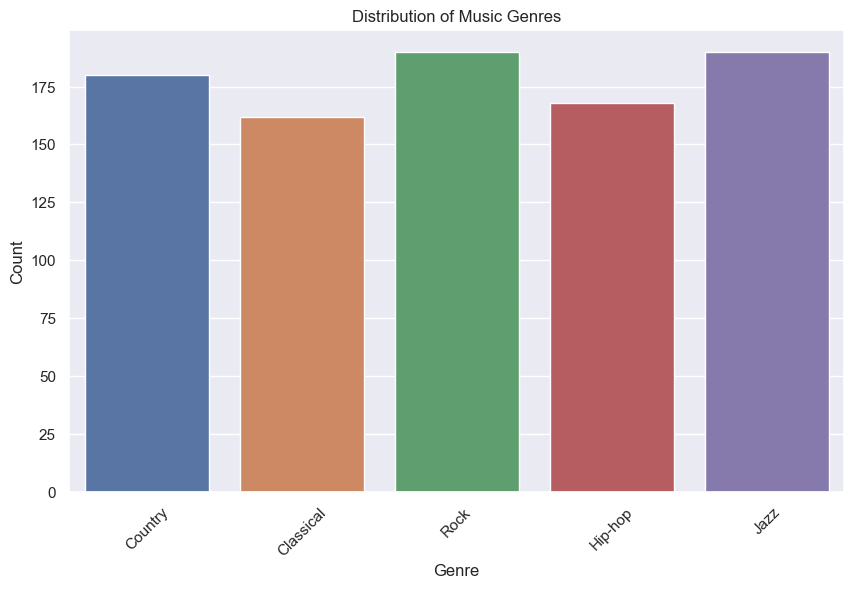

In [18]:
#Plotting all the genres 
plt.figure(figsize=(10,6))
sns.countplot(data= df_music, x='Genre')
plt.title('Distribution of Music Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()